In [64]:
import numpy as np
from scipy.misc import imresize
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as patchess
import matplotlib.gridspec as gridspec
from skimage import transform, filters
import sys, os
#import operator
#import csv

%matplotlib notebook

%load_ext autoreload
%autoreload 2

import caffe # this should be the version from https://github.com/jimmie33/Caffe-ExcitationBP

from helpers import *
from heatmaps import *
from optimize_mask import *
from figures import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# TODO: Change this to your own Caffe-ExcitationBP directory
caffe_dir = '/home/ruthfong/sample_code/Caffe-ExcitationBP/'

save_figs = False
if save_figs:
    # TODO: Change to a preferred figures directory
    fig_dir = '/home/ruthfong/neural_coding/paper_figures/'
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)

In [37]:
gpu = 0
net_type = 'googlenet'

if gpu is not None:
    caffe.set_device(gpu)
    caffe.set_mode_gpu()
else:
    caffe.set_mode_cpu()
    
net = get_net(net_type)

In [38]:
labels_desc = np.loadtxt(os.path.join(caffe_dir, 'data/ilsvrc12/synset_words.txt'), str, delimiter='\t')
synsets = np.loadtxt(os.path.join(caffe_dir, 'data/ilsvrc12/synsets.txt'), str, delimiter='\t')
indexing = np.loadtxt('../../../data/ilsvrc12/ascii_order_to_synset_order.txt')
(paths, labels) = read_imdb('../../../data/ilsvrc12/annotated_train_heldout_imdb.txt')
data_desc = 'train_heldout'
paths = np.array(paths)
labels = np.array(labels)

# TODO show how to replicate
ann_dir = '/data/ruthfong/ILSVRC2012/annotated_train_heldout_ground_truth_annotations' 
ann_paths = np.sort([os.path.join(ann_dir, f) for f in os.listdir(ann_dir)])
mask_dir = '/data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_8_blur_mask_5_jitter_4_noise_-inf_num_iters_300_tv2_mask_init'
mask_paths = [os.path.join(mask_dir, '%d.npy' % x) for x in range(len(labels))]

# Splash Figure (Figure 1)

<IPython.core.display.Javascript object>


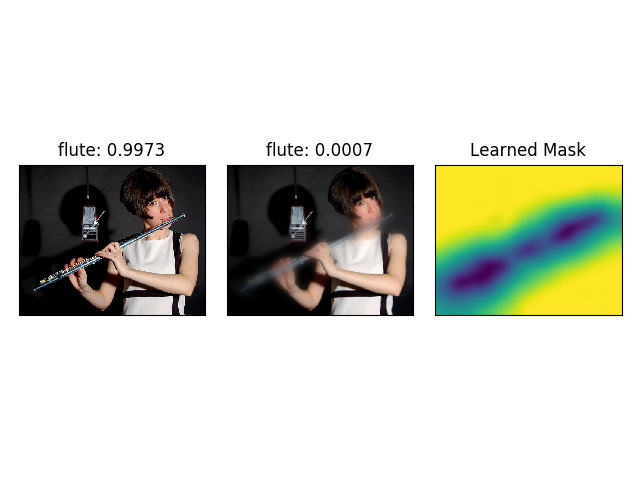

In [40]:
ind = 7
if save_figs:
    fig_path = os.path.join(fig_dir, 'splash_%d.pdf' % ind)
else:
    fig_path = None
generate_splash_img(net, paths[ind], labels[ind], mask_paths[ind], perturbation = 'blur', fig_path = fig_path)

# Compare with Other Saliency Methods (Figure 2)

<IPython.core.display.Javascript object>


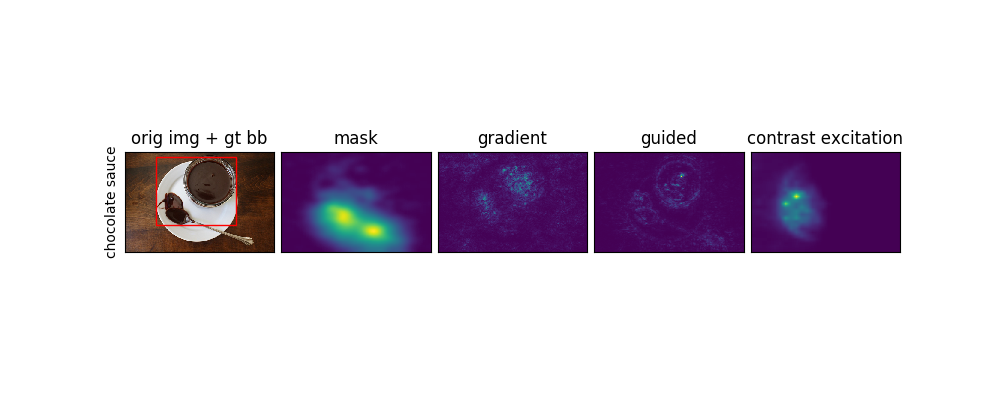

<IPython.core.display.Javascript object>


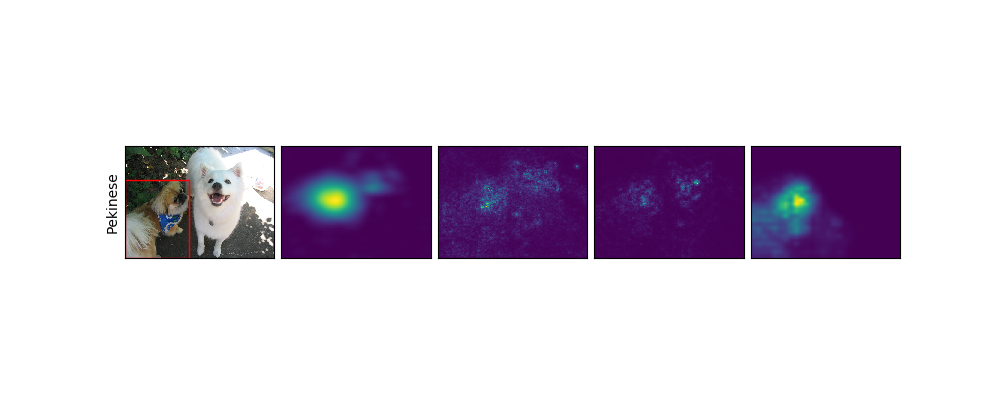

<IPython.core.display.Javascript object>


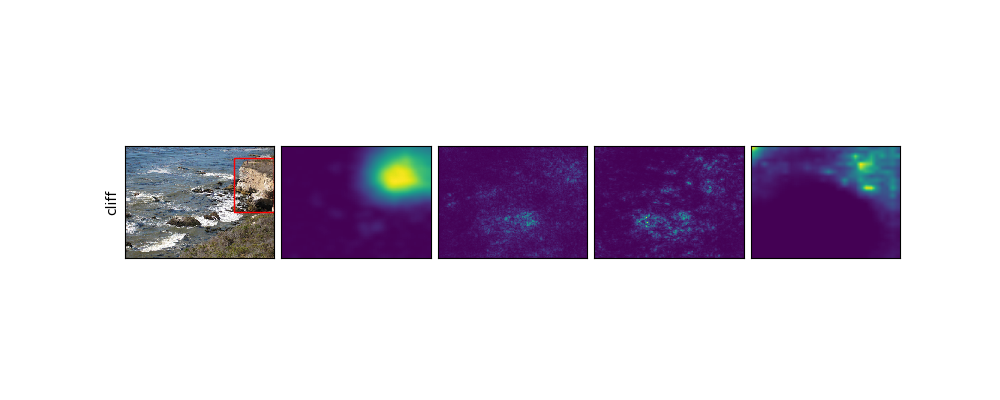

<IPython.core.display.Javascript object>


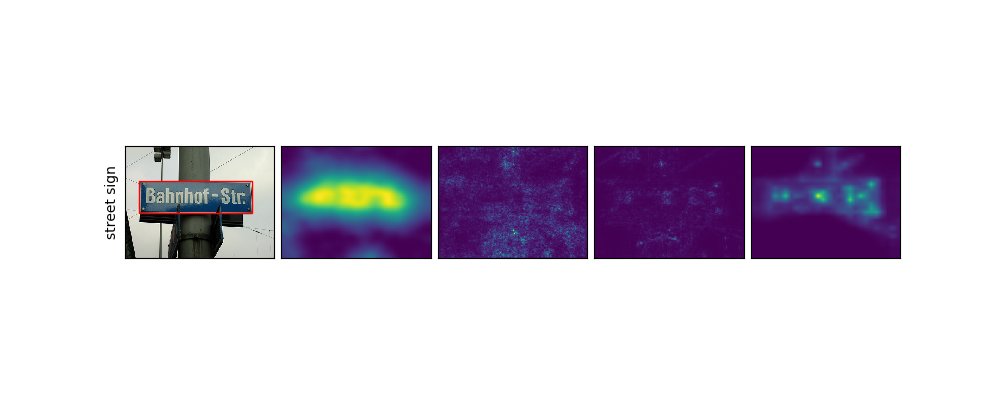

<IPython.core.display.Javascript object>


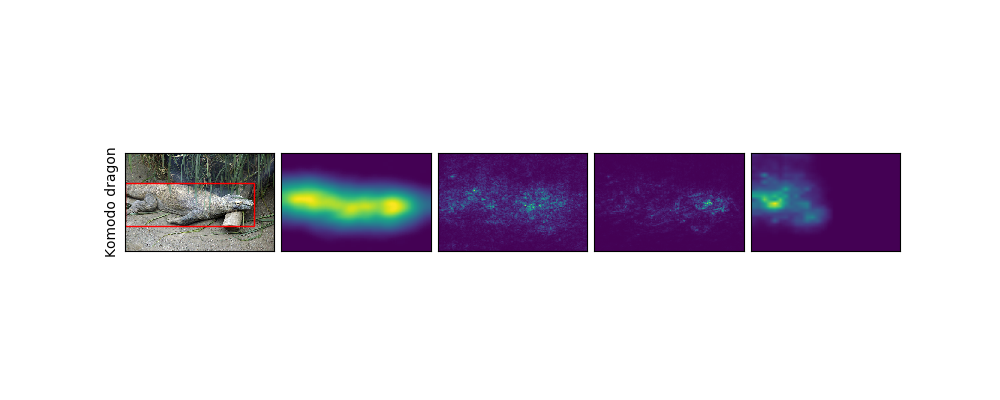

<IPython.core.display.Javascript object>


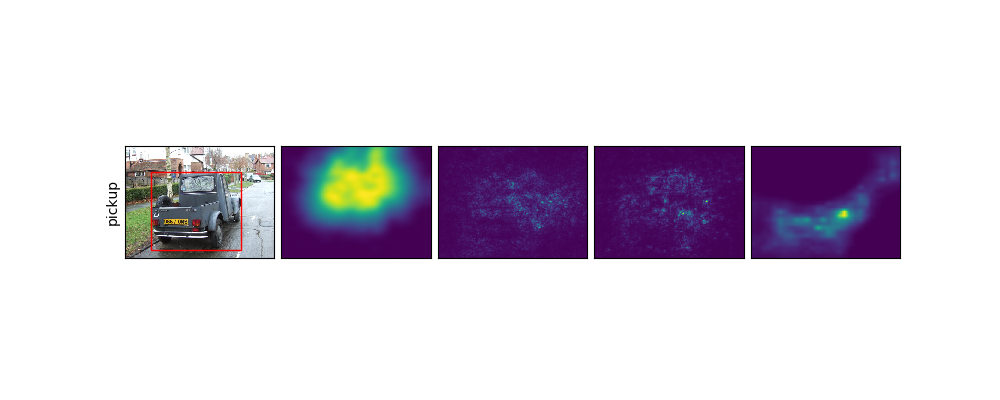

<IPython.core.display.Javascript object>


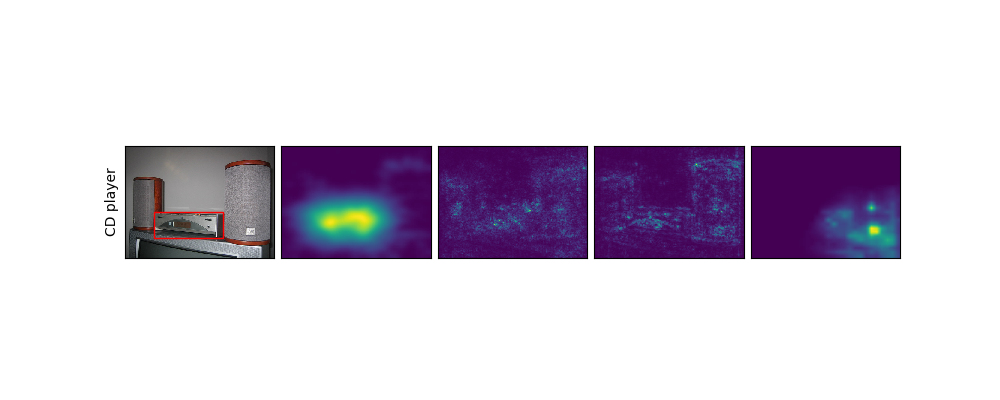

<IPython.core.display.Javascript object>


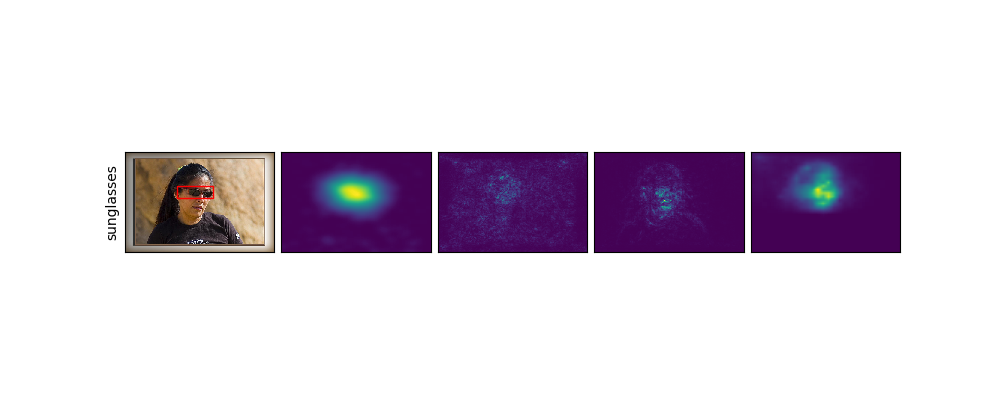

<IPython.core.display.Javascript object>


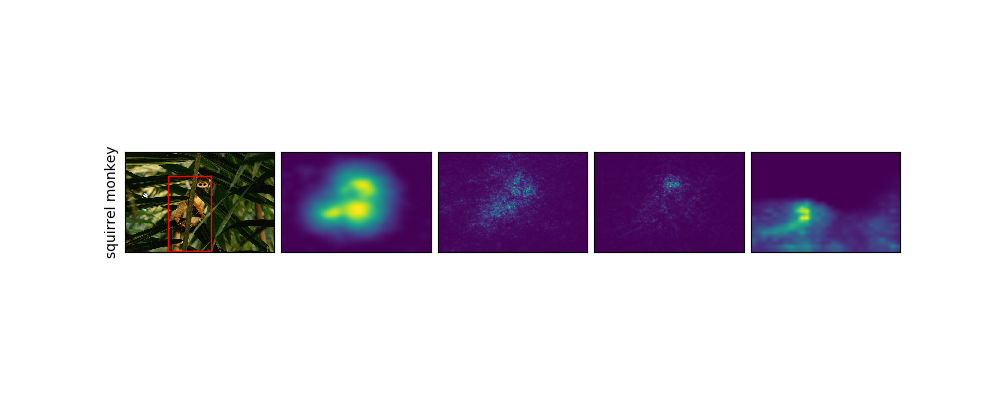

In [41]:
interested_idx = [12, 10, 11, 17, 151, 30, 79, 322, 186]
for i in range(len(interested_idx)):
    img_path = paths[interested_idx[i]]
    mask_path = mask_paths[interested_idx[i]]
    ann_path = ann_paths[interested_idx[i]]
    label = labels[interested_idx[i]]
    fig_path = None
    show_titles = False
    fig_sub = ''
    if i == 0:
        show_titles = True
        fig_sub = '_w_titles'
    if save_figs:
        fig_path = os.path.join(fig_dir, 'compare_saliency_%d%s.pdf' % (i, fig_sub))
    visualize_heatmaps(net, img_path, mask_path, label, ann_path = ann_path, show_titles = show_titles, 
                       show_bbs = False, mask_flip = True, thres_first = True, fig_path = fig_path, gpu = gpu, 
                       synsets = synsets, indexing = indexing)

# Template Matching Figure (Figure 3)
(Simonyan et al., 2014)

<IPython.core.display.Javascript object>


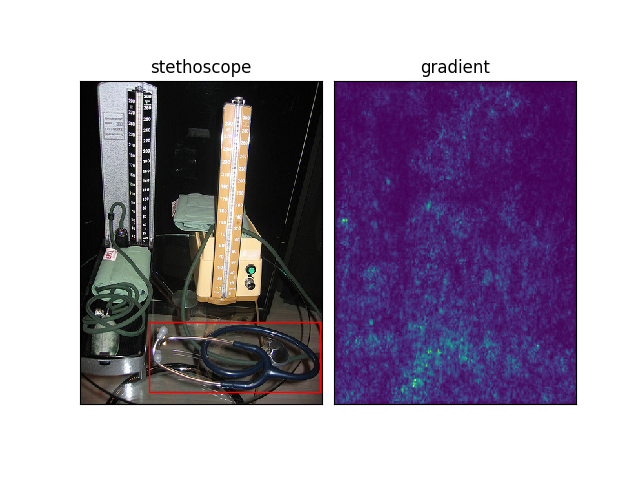

<IPython.core.display.Javascript object>


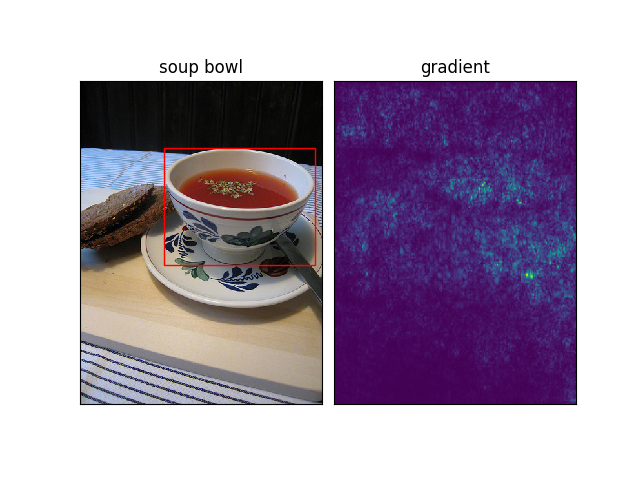

In [42]:
interested_idx = [0,14] # interested_idx = [0,7,13,14]
for i in interested_idx:
    if save_figs:
        fig_path = os.path.join(fig_dir, 'saliency_%d.pdf' % i)
    else:
        fig_path = None
    show_saliency_map(net, paths[i], labels[i], ann_path = ann_paths[i], gpu = gpu, 
                     fig_path = fig_path)

# Perturbations Figure (Figure 4)

In [49]:
constant_mask_dir = '/data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top0_prob_mean_img/lr_-1.00_l1_lambda_-4.00_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_8_blur_mask_5_jitter_4_noise_-inf_num_iters_300_tv2_mask_init'
constant_mask_paths = [os.path.join(constant_mask_dir, '%d.npy' % x) for x in range(len(labels))]
noise_mask_dir = '/data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top0_prob_random_noise/lr_-1.00_l1_lambda_-4.00_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_8_blur_mask_5_jitter_4_noise_-inf_num_iters_300_tv2_mask_init'
noise_mask_paths = [os.path.join(noise_mask_dir, '%d.npy' % x) for x in range(len(labels))]

<IPython.core.display.Javascript object>


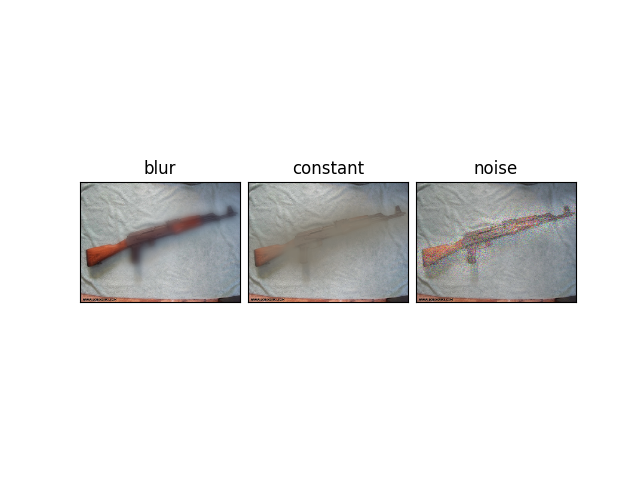

<IPython.core.display.Javascript object>


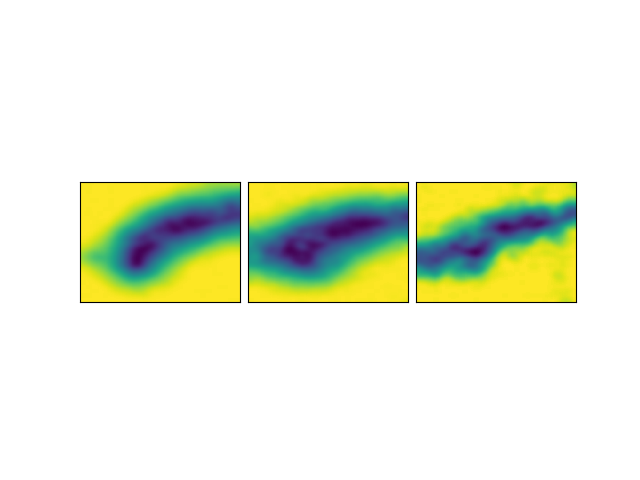

In [50]:
transformer = get_ILSVRC_net_transformer(net)
interested_idx = [87] # interested_idx = [31,50,67,71,87]
for i in interested_idx:
    img_fig_path = None
    mask_fig_path = None
    if save_figs:
        img_fig_path = os.path.join(fig_dir, 'perturbations_%d.pdf' % i)
        mask_fig_path = os.path.join(fig_dir, 'perturbations_masks_%d.pdf' % i)
    generate_perturbations_figure(transformer, paths[i], 
                                  [mask_paths[i], constant_mask_paths[i], noise_mask_paths[i]],
                                  show_masks = False,
                                  fig_path = img_fig_path)
    generate_perturbations_figure(transformer, paths[i], 
                                  [mask_paths[i], constant_mask_paths[i], noise_mask_paths[i]],
                                  show_masks = True,
                                  fig_path = mask_fig_path)

# Artifacts Figure (Figure 5)

<IPython.core.display.Javascript object>


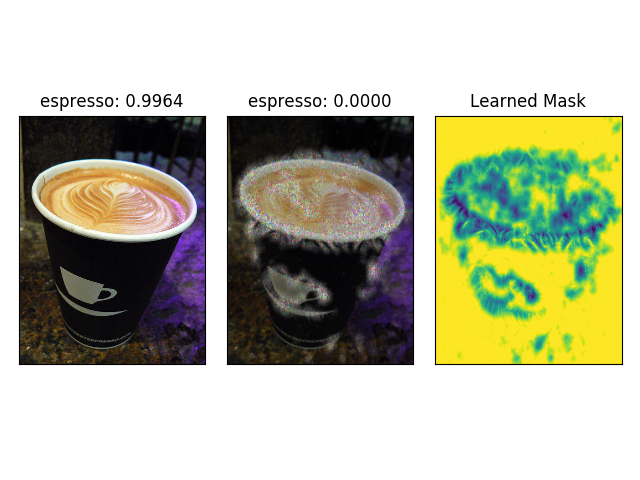

<IPython.core.display.Javascript object>


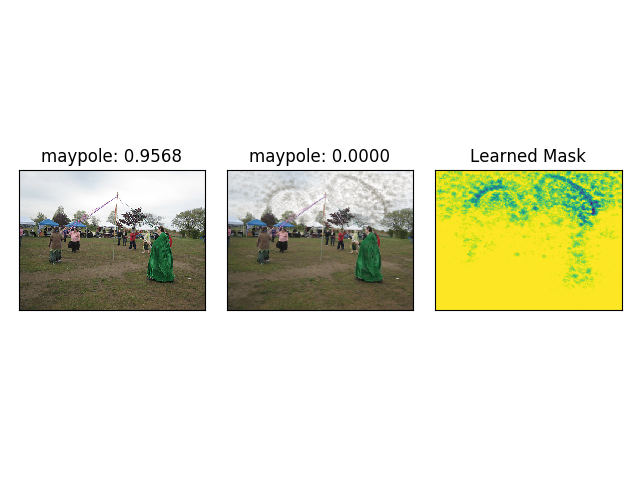

In [52]:
interested_idx = [9, 4]
arts_perturbs = ['random_noise', 'mean_img']
arts_mask_paths = ['/data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top5_prob_avg_blur_blank_noise/lr_0_l1_lambda_-5.00_tv_lambda_-3.00_beta_3.00_jitter_4_noise_-3.0_num_iters_300_tv2/9.npy', 
                  '/data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top5_prob_mean_img/lr_-1.00_l1_lambda_-4.00_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_1_blur_mask_0_jitter_4_noise_-inf_num_iters_300_tv2/4.npy']
for i in range(len(interested_idx)):
    path = paths[interested_idx[i]]
    label = labels[interested_idx[i]]
    mask_path = arts_mask_paths[i]
    perturbation = arts_perturbs[i]
    fig_path = None
    if save_figs:
        fig_path = os.path.join(fig_dir, 'artifacts_%s_%d.pdf' % (perturbation, interested_idx[i]))
    generate_splash_img(net, path, label, mask_path, perturbation = perturbation, fig_path = fig_path)

# Interrogating Suppressive Effects (Figure 6)

<IPython.core.display.Javascript object>


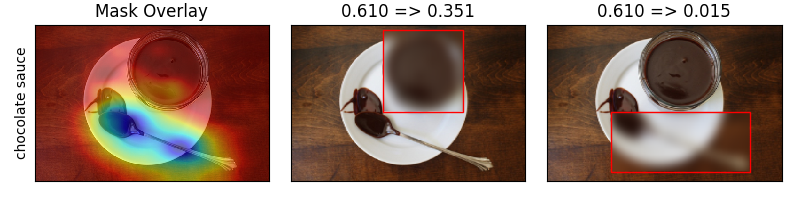

In [60]:
# chocolate sauce
ind = 12
img_path = paths[ind]
label = labels[ind]
mask_path = mask_paths[ind]
ann_path = ann_paths[ind]

# disp_img(img_path, (224,224)) # use to find coordinates of bounding boxes on resized 224x224 image

obj1_bb = [88, 7, 164, 124] # pot
obj2_bb = [61, 125, 193, 210] # spoon

objs_bbs = [obj1_bb, obj2_bb]
pylab.rcParams['figure.figsize'] = (8, 2.0)
fig_path = None
if save_figs:
    fig_path = os.path.join(fig_dir, 'chocolate_masked_example.pdf')

manual_edit_img(net, img_path, label, mask_path, objs_bbs, fig_path = fig_path, labels_desc = labels_desc)

<IPython.core.display.Javascript object>


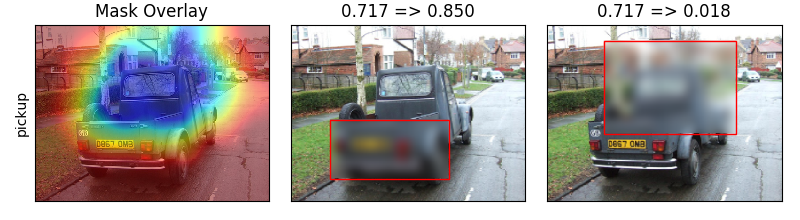

In [61]:
# pick up truck
ind = 30
img_path = paths[ind]
label = labels[ind]
mask_path = mask_paths[ind]
ann_path = ann_paths[ind]

# see contrastive excitation backprop saliency map (and choose bounding box coordinates)
#transformer = get_ILSVRC_net_transformer(net)
#heatmap = compute_heatmap(net, transformer, img_path, label, 'contrast_excitation_backprop', 'loss3/classifier', 'loss3/classifier',
#                    outputBlobName = 'pool3/3x3_s2', outputLayerName = 'pool3/3x3_s2', secondTopBlobName = 'pool5/7x7_s1',
#                    secondTopLayerName = 'pool5/7x7_s1', norm_deg = -2, gpu = gpu)
#f, ax = plt.subplots(1,1)
#ax.imshow(imresize(heatmap, (224,224)))

# see learned mask (and choose bounding box coordinates)
#mask = np.load(mask_path)
#f, ax = plt.subplots(1,1)
#ax.imshow(mask)

# disp_img(img_path, (224,224))

obj1_bb = [37,120,150,195] # contrast_excitation_backprop
obj2_bb = [54,20,180,138] # mask

objs_bbs = [obj1_bb, obj2_bb]

fig_path = None
if save_figs:
    fig_path = os.path.join(fig_dir, 'chocolate_masked_example.pdf')

pylab.rcParams['figure.figsize'] = (8, 2.2)
manual_edit_img(net, img_path, label, mask_path, objs_bbs, fig_path = fig_path)

# Deletion Region Representativeness Experiment (Figures 7 and 8)

<IPython.core.display.Javascript object>


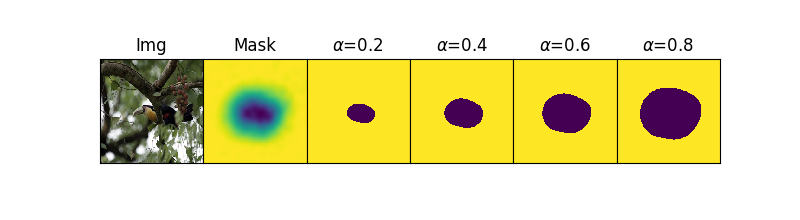

<IPython.core.display.Javascript object>


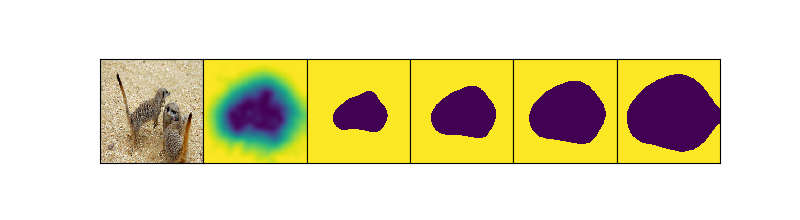

In [67]:
interested_idx = [5,6]

transformer = get_ILSVRC_net_transformer(net)
alphas = np.arange(0.2,1.0,0.2)

for j in range(len(interested_idx)):
    ind = interested_idx[j]
    path = paths[ind]
    mask_path = mask_paths[ind]
    label = labels[ind]
    show_titles = True if j == 0 else False
    fig_path = os.path.join(fig_dir, 'sanity_check_test_%d.pdf' % ind) if save_figs else None
    deletion_region_exp_setup_fig(path, label, mask_path, transformer, alphas = alphas, show_titles = show_titles, 
                                  fig_path = fig_path)

## Pre-reqs:
* Learn optimized masks for 5000 heldout images (Run `python optimize_mask.py`)
* Run `python deletion_region_representativeness.py`

<IPython.core.display.Javascript object>


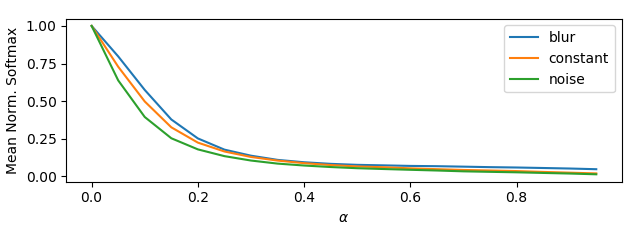

In [68]:
alphas = np.arange(0,1.0,0.05)
pylab.rcParams['figure.figsize'] = [6.4, 2.4]
perturbations = ['blur', 'mean_img', 'random_noise']
disp_names = ['blur', 'constant', 'noise']

# TODO: Replace with the directory/paths in which deletion representativeness experiment scores were saved
score_paths = ['/home/ruthfong/neural_coding/sanity_check_test/googlenet_train_heldout_%s_scores.txt' % p for p in perturbations]
scores = []

fig_path = None
if save_figs:
    fig_path = os.path.join(fig_dir, 'sanity_check_test_graph_shrink.pdf')
for i in range(len(score_paths)):
    scores.append(np.loadtxt(score_paths[i]))
scores = np.array(scores)
f, ax = plt.subplots(1,1)
for i in range(3):
    means = np.zeros(len(alphas))
    for j in range(len(alphas)):
        x = scores[i,:,j]
        x = x[np.invert(np.isnan(x))]
        x = np.maximum(0,np.minimum(x,1))
        means[j] = x.mean()
    ax.plot(alphas, means, label=disp_names[i])
    #ax.errorbar(alphas, means, yerr=x.std(), label=perturbations[i])
ax.legend(loc='upper right')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Mean Norm. Softmax')
plt.tight_layout()

plt.savefig(, bbox_inches='tight', pad_inches=0.0)

# Deletion Game (Figure 9)

## Pre-reqs:
* Learn optimized masks for 5000 heldout images (Run `python optimize_mask.py`)
* Run `python deletion_game.py`

<IPython.core.display.Javascript object>


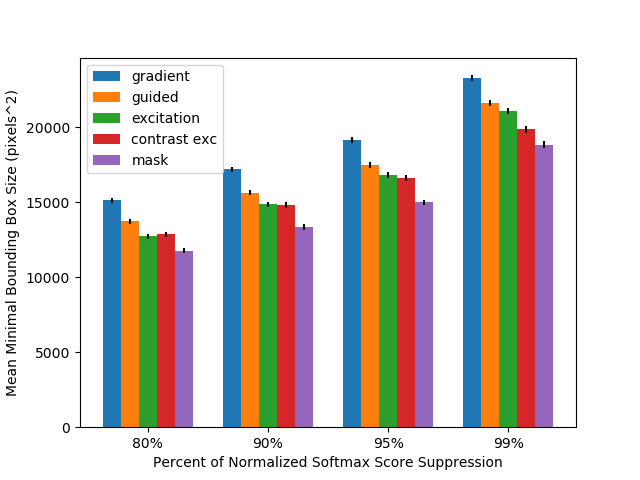

In [72]:
fig_path = os.path.join(fig_dir, 'deletion_game_bar.pdf') if save_figs else None

base_dir = '/home/ruthfong/neural_coding/deletion_game/googlenet_train_heldout/googlenet_train_heldout_given_grad_1_norm_0/min_top0_prob_blur/lr_-1.00_l1_lambda_-4.00_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_8_blur_mask_5_jitter_4_noise_-inf_num_iters_300_tv2_mask_init'
heatmap_types = ['saliency', 'guided_backprop', 'excitation_backprop', 'contrast_excitation_backprop', 'mask']
num_imgs = len(labels)
alphas = np.arange(0,1,0.01)
scores = np.zeros((len(heatmap_types), num_imgs, len(alphas)))
bb_sizes = np.zeros((len(heatmap_types), num_imgs, len(alphas)))

for i in range(len(heatmap_types)):
    heatmap_type = heatmap_types[i]
    bb_size = np.loadtxt(os.path.join(base_dir, 'bb_sizes_num_imgs_5000_%s.txt' % heatmap_type))
    score = np.loadtxt(os.path.join(base_dir, 'alpha_scores_num_imgs_5000_%s.txt' % heatmap_type))
    bb_sizes[i,...] = bb_size[:num_imgs]
    scores[i,...] = score[:num_imgs]

thresholds = np.arange(0.01,1.01,0.01)
best_bb_sizes = np.zeros((len(heatmap_types),num_imgs,len(thresholds)))
count = 0
normalize = False
for i in range(len(thresholds)):
    threshold = thresholds[i]
    for j in range(num_imgs):
        for k in range(len(heatmap_types)):
            try: 
                best_i = np.where(scores[k][j] <= threshold)[0][-1]
                best_bb_sizes[k][j][i] = bb_sizes[k][j][best_i]
            except:
                #print j, heatmap_types[k]
                best_bb_sizes[k][j][i] = np.nan
                count += 1
        if normalize:
            best_bb_sizes[:,j,i] = best_bb_sizes[:,j,i]/float(best_bb_sizes[0,j,i])

means = np.zeros((len(thresholds), len(heatmap_types)))
stds = np.zeros((len(thresholds), len(heatmap_types)))
counts = np.zeros((len(thresholds), len(heatmap_types)))

for i in range(len(thresholds)):
    for j in range(len(heatmap_types)):
        x = best_bb_sizes[j,:,i]
        x = x[~np.isnan(x)]
        #print thresholds[i], heatmap_types[j], x.mean(), x.std()
        means[i,j] = x.mean()
        stds[i,j] = x.std()
        counts[i,j] = len(x)

threshold_points = [19,9,4,0]  # corresponds with 80%, 90%, 95%, 99% score suppression (thresholds 20%, 10%, 5%, and 1% resp.)
# print thresholds[threshold_points]

bar_data = np.zeros((len(threshold_points),len(heatmap_types)))
bar_se = np.zeros((len(threshold_points), len(heatmap_types)))
width = 0.15
for i in range(len(threshold_points)):
    t_i = threshold_points[i]
    bar_data[i,:] = means[t_i]
    bar_se[i,:] = np.true_divide(stds[t_i],counts[t_i]**0.5)

pylab.rcParams['figure.figsize'] = [6.4, 4.8]
f, ax = plt.subplots(1,1)
for i in range(len(heatmap_types)):
    ax.bar([j+i*width for j in range(len(threshold_points))], bar_data[:,i], width, label=heatmap_types[i], yerr=bar_se[:,i])

ax.set_xlabel('Percent of Normalized Softmax Score Suppression')
ax.set_ylabel('Mean Minimal Bounding Box Size (pixels^2)')
ax.set_xticks(np.arange(len(threshold_points)) + 2*width)
ax.set_xticklabels(('80%', '90%', '95%', '99%'))

ax.legend(('gradient', 'guided', 'excitation', 'contrast exc', 'mask'))

if fig_path is not None:
    plt.savefig(fig_path, bbox_inches='tight', pad_inches=0.0)

/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10
/home/ruthfong/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10


<IPython.core.display.Javascript object>


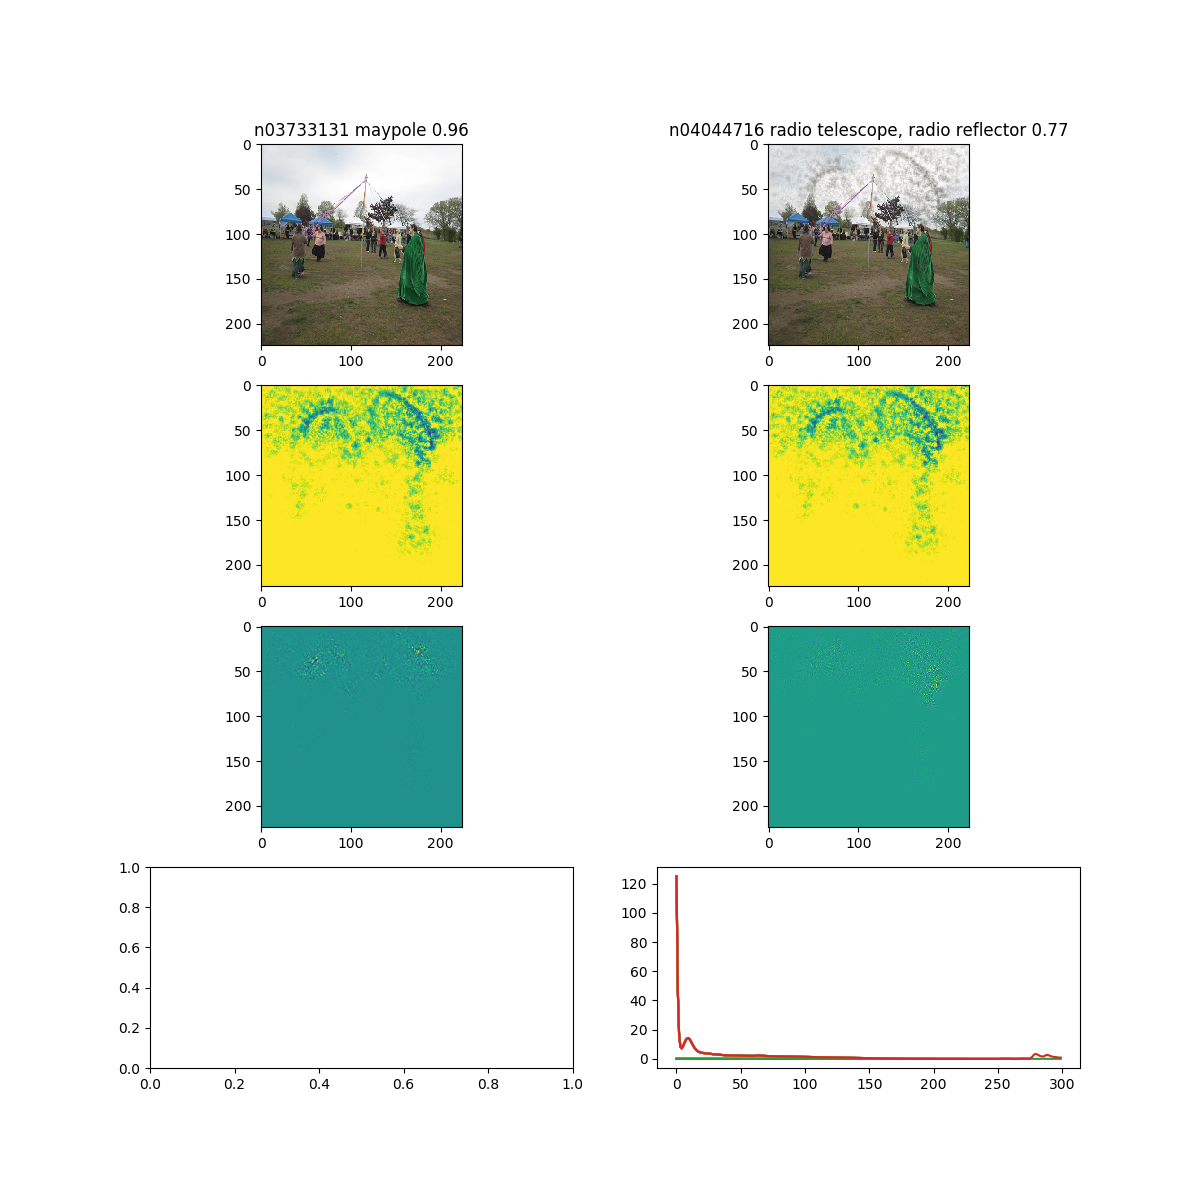

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top5_prob_mean_img/lr_-1.00_l1_lambda_-4.00_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_1_blur_mask_0_jitter_4_noise_-inf_num_iters_300_tv2/4.npy


<IPython.core.display.Javascript object>


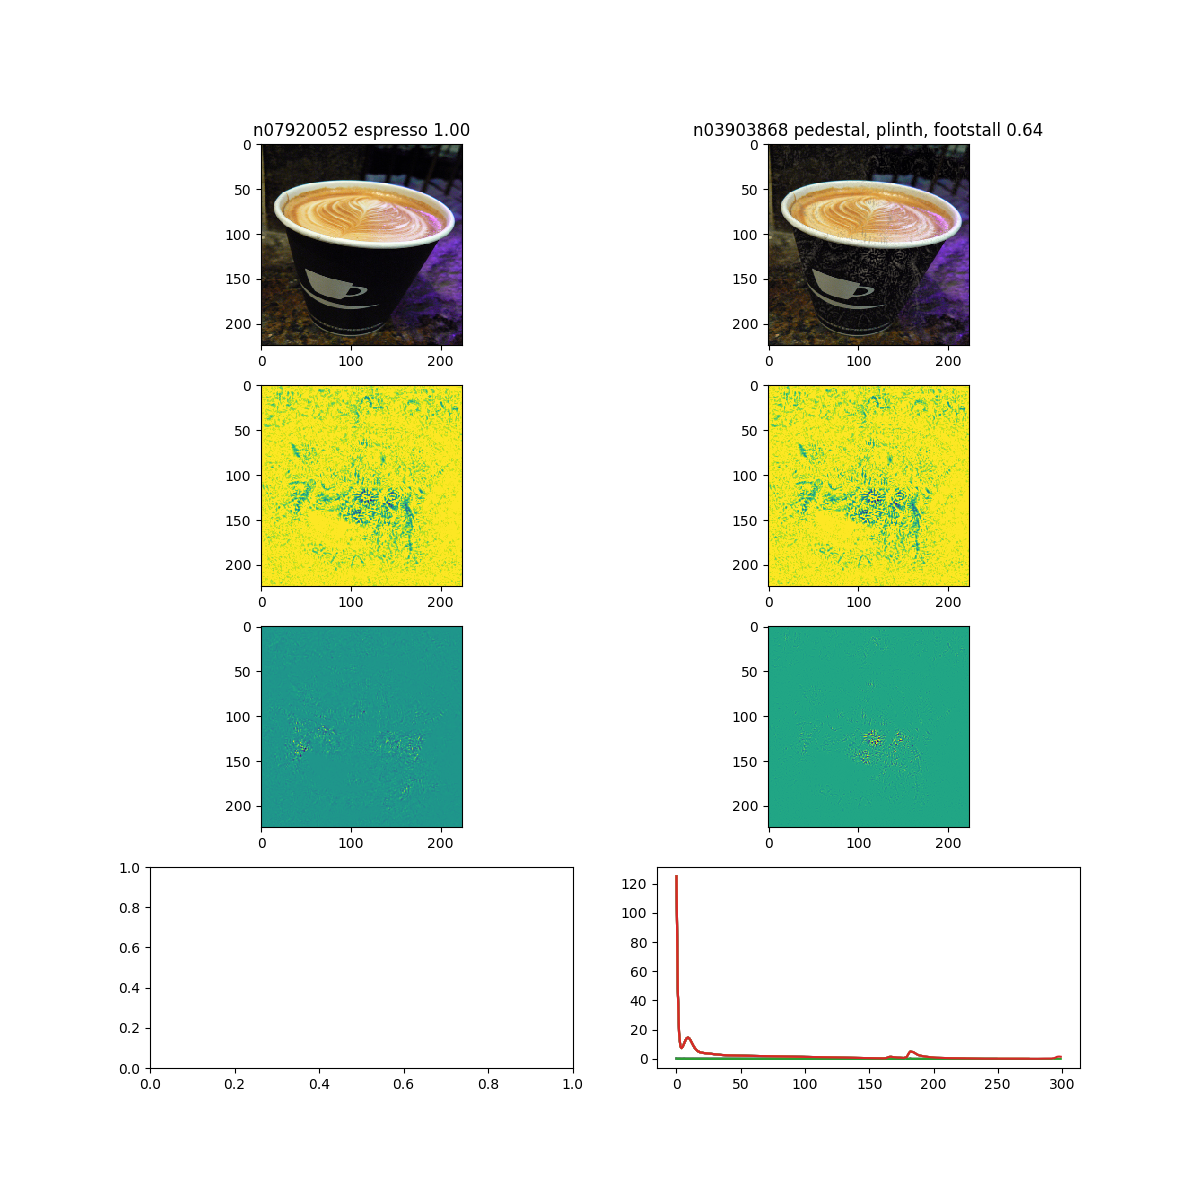

saved mask to /data/ruthfong/neural_coding/pycaffe_results/googlenet_train_heldout_given_grad_1_norm_0/min_top5_prob_mean_img/lr_-1.00_l1_lambda_-4.00_tv_lambda_-inf_l1_lambda_2_-2.00_beta_3.00_mask_scale_1_blur_mask_0_jitter_4_noise_-inf_num_iters_300_tv2/9.npy


In [92]:
num_iters = 300
lr = 1e-1
l1_lambda = 1e-4
l1_ideal = 1
l1_lambda_2 = 0
tv_lambda = 1e-2
tv_beta = 3
jitter = 4
num_top = 5
noise = 0
null_type = 'mean_img'
given_gradient = True
norm_score = False
end_layer = 'prob'
use_conv_norm = False
blur_mask = 0
mask_scale = 1
    
net_transformer = get_ILSVRC_net_transformer(net)
for i in [4,9]:
    fig_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_figs/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%.2f_l1_lambda_%.2f_l1_lambda2_%.2f_tv_lambda_%.2f_beta_%.2f_mask_scale_%d_blur_mask_%d_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.png' % (
        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(l1_lambda_2), np.log10(tv_lambda), tv_beta, mask_scale, blur_mask, jitter, np.log10(noise), num_iters, i))
    mask_path = os.path.join('/data/ruthfong/neural_coding/pycaffe_results/%s_%s_given_grad_%d_norm_%d/min_top%d_%s_%s/lr_%.2f_l1_lambda_%.2f_tv_lambda_%.2f_l1_lambda_2_%.2f_beta_%.2f_mask_scale_%d_blur_mask_%d_jitter_%d_noise_%.1f_num_iters_%d_tv2/%d.npy' % (
        net_type, data_desc, int(given_gradient), int(norm_score), num_top, end_layer, null_type, np.log10(lr), np.log10(l1_lambda), np.log10(l1_lambda_2), np.log10(tv_lambda), tv_beta, mask_scale, blur_mask, jitter, np.log10(noise), num_iters, i))


    if os.path.exists(mask_path):
        print '%s already exists so skipping' % mask_path
        continue

    #net = get_net(net_type)
    #net_transformer = get_ILSVRC_net_transformer(net)

    path = paths[i]
    img = net_transformer.preprocess('data', caffe.io.load_image(path))
    net.blobs['data'].data[...] = img
    net.forward()
    scores = np.squeeze(net.blobs['prob'].data)
    sorted_idx = np.argsort(scores)
    if given_gradient:
        target = np.zeros(scores.shape)
        if num_top == 0:
            target[labels[i]] = 1
        else:
            target[sorted_idx[:-(num_top+1):-1]] = 1
    else:
        if num_top == 0:
            target = np.array([labels[i]])
        else:
            target = sorted_idx[:-(num_top+1):-1]

    #mask_radius = test_circular_masks(net, paths[i], labels[i], plot = False)
    #mask_init = 1-create_blurred_circular_mask((net.blobs['data'].data.shape[2], net.blobs['data'].data.shape[3]),
    #                                     mask_radius, center = None, sigma = 10)

    optimize_mask(net, path, target, labels = labels_desc, given_gradient = given_gradient, norm_score = norm_score,
                        num_iters = num_iters, lr = lr, l1_lambda = l1_lambda, l1_ideal = 1,
                        l1_lambda_2 = l1_lambda_2, tv_lambda = tv_lambda, tv_beta = tv_beta, mask_scale = mask_scale,
                        use_conv_norm= use_conv_norm, blur_mask = blur_mask, jitter = jitter,
                        null_type = null_type, mask_init = None, gpu = gpu, start_layer = None, end_layer = end_layer,
                        plot_step = 25, debug = False, fig_path = fig_path, mask_path = mask_path)